# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import mlab
from math import sqrt
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')

In [12]:
# Your work here.
# General Exploration
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [13]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


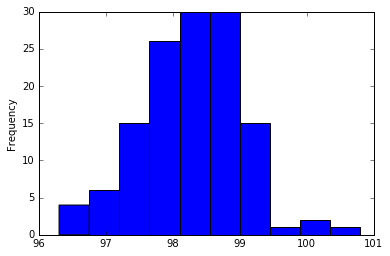

In [14]:
# Question 1 Is the distribution of body temperatures normal?
# Exploring by doing a plot
# Seems like normal but skewed
df.temperature.plot(kind='hist')

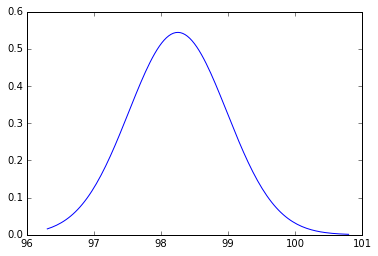

In [21]:
# Plotting it how it would be normal
# It seems very close
x = np.linspace(df.temperature.min(),df.temperature.max(),len(df))
mu = df.temperature.mean()
sigma = df.temperature.std()
norm_dist = mlab.normpdf(x, mu, sigma)

plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

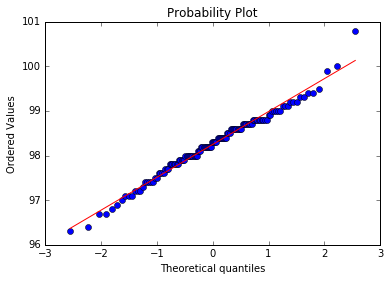

In [31]:
# We also plot the q-q plot (theoretical quantiles vs sample values, 
# if it's a straight line, it's normally distributed)
# we observe that it is almost a straight line

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()


In [34]:
# We also perform a chi-squared test to show that our data follow the normal distribution
from scipy.stats import chisquare
chisquare(df.temperature, norm_dist)

Power_divergenceResult(statistic=60912390.789862968, pvalue=0.0)

In [ ]:
# It is normally distributed


In [ ]:
# Question 2: Is the sample size large? Are the observations independent?
# Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [39]:
# The sample is large enough > 30 and we assume there is nothing special with the random people selected
# therefore we can assume they are independent

In [43]:
# 3. 0)Is the true population mean really 98.6 degrees F?
df.temperature.mean()

98.249230769230749

In [22]:
# No because the sampling mean of a large sample is not!

In [34]:
# 3i) two-sample test, since we perform the test on different populations
# 3ii) We can use the z-statistic since we have many samples
x = df.temperature.mean()
s = df.temperature.std()
n = len(df)
z = (x - 98.6)/(s/sqrt(n))
print "z value is", z
print "p-value of z statistic is", st.norm.cdf(z)


z value is -5.45482329236
p-value of z statistic is 2.45107850705e-08


In [35]:
# So according to the z-statistic there is a statistically significant difference (p<.05)
# It is statistically significant smaller

In [38]:
# 3iii) Using t-test we expect a larger p-value because it is a "fatter" distribution
t = (x - 98.6)/(s/sqrt(n))
print "t value is", t
print "p-value of t statistic is", st.t.cdf(t, n-1)

t value is -5.45482329236
p-value of t statistic is 1.20531602078e-07


In [ ]:
# So according to the t-statistic there is a statistically significant difference (p<.05)
# It is statistically significant smaller
# But with a smaller p-value than the z-statistic

In [ ]:
# z statistic

# 4. t statistic
# 5. 95% interval x=mu + 1.96*sigma
# 6. non-paired t.test with women